In [137]:
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Sources
1. [Учебник по машинному обучению от Яндекса](https://education.yandex.ru/handbook/ml/article/reshayushchiye-derevya) <br>
2. [Лекции Александра Дьяконова](https://aimasters.ru/ml) 


1. Подход к построению одного дерева по одной переменной 
    1.1 Посчитать H(r) -  меру неоднородности (рассказать про нее)
    1.2 Построить предикат (выбрать целевые метки, для классификации mode(), для регресии mse)
    1.3 Снова посчитать H(r)
    1.4 и так далее пока либо не закончатся вершины, либо мы не достигнем определенной глубины дерева, либо imputity не достигнет какого то значения
    
2. 
    

## Решающие деревья - введение

Решающие деревья - это семейство нелинейных методов машинного обучения, основанных на построении простых решающих правил <br>

Первые алгоритмы появились во второй половине 20-ого века, в 1970–1990-e годы интерес к ним был весьма велик как в индустрии, где был полезен хорошо интерпретируемый классификатор, так и в науке, где учёные интересовались способами приближённого решения NP-полных задач (что это такое я рассказывать не буду).

В связи с этим сложилось много хорошо работающих наборов эвристик, у которых даже были имена: например, ID3 был первой реализацией дерева, минимизирующего энтропию, а CART — первым деревом для регрессии. Некоторые из них были запатентованы и распространялись коммерчески. Но сейчас это все стало бесполезным, так как люди за 40 лет научились научились реализовывать различные сочетания таких алгоритмов путем настройки их через гиперпараметры, ну и тому подобным вещам, о которых я сейчас и буду рассказывать 

### Как выглядит дерево и из чего оно состоит

Терминальная вершина - это самая первая вершина, с которой начинается как построение дерева, так и отнесение обьекта к какому то классу в процессе применения алгоритма, в случае решения задачи классификации, или к присваиванию какого то вещественного значения, в случае решения задачи регрессии. Да, с помощью деревьев решений можно решать обе эти задачи

Предикат - это значение, 
Внутренняя вершина, или по другому, ветвление

Дуга - или значение предиката (предикат True - идем вправо, False - идем влево)

Лист - записанное предсказание метки класса или вещественного значения

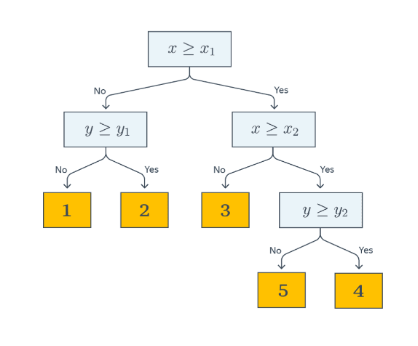

In [141]:
Image(filename = "решающ дерево.png", width=400, height=500)

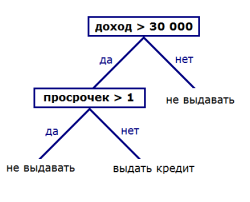

In [143]:
Image(filename = "реш дер дьяк.png", width=300, height=400)

### Как выгдядит предкат

Для вещественного признака предикат - это сравнение с некоторым вещественным порогом

Для категориального признака - это принадлежность к какой то константе, какому то значению среди значений признака

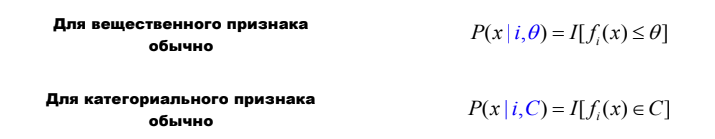

In [147]:
Image(filename = "предикаты.png", width=700, height=700)

### Как происходит построение этого предиката (расчет порога для сплита)?
Процесс называется расщепление на области/регионы. Предикат, о котором я говорил, разделяет признак по какому то значению, это можно увидеть на картинках ниже.

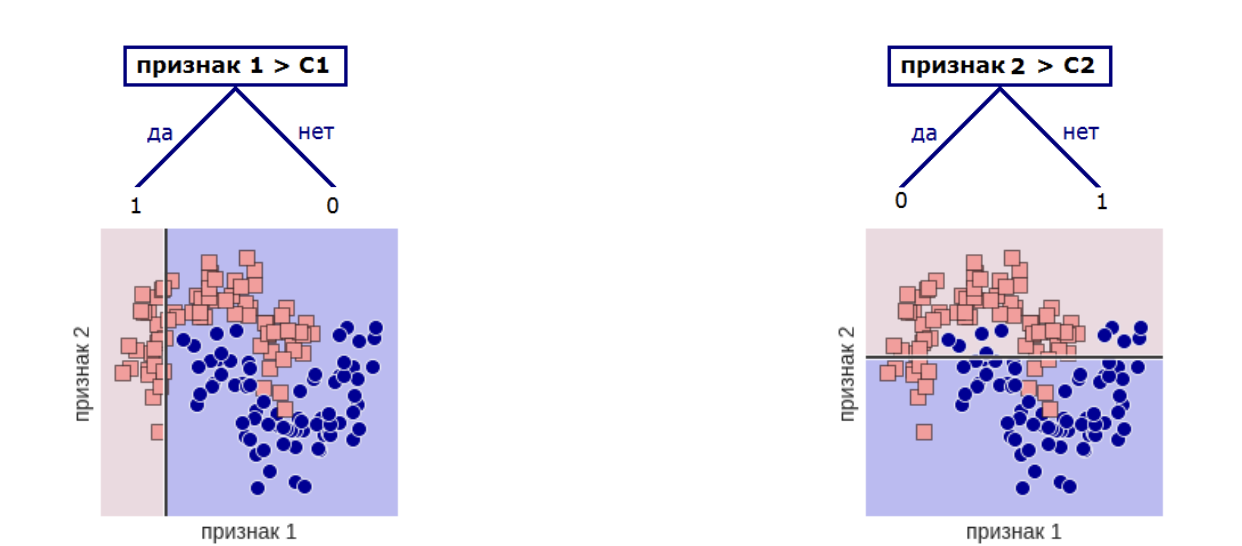

In [149]:
Image(filename = "расщепление на области.png", width=700, height=700)

### Как выбрать порог расщепления?

При выборе значения предиката, мы хотим добиться некого наилучшего разделения, чтобы в одну ветку попало как можно больше меток одного класса, а в другую второго класса. Как пример, можно взглянуть на картинку ниже, которая иллюстрирует это. Мы видим, "хорошее" разделение и "плохое разделение"

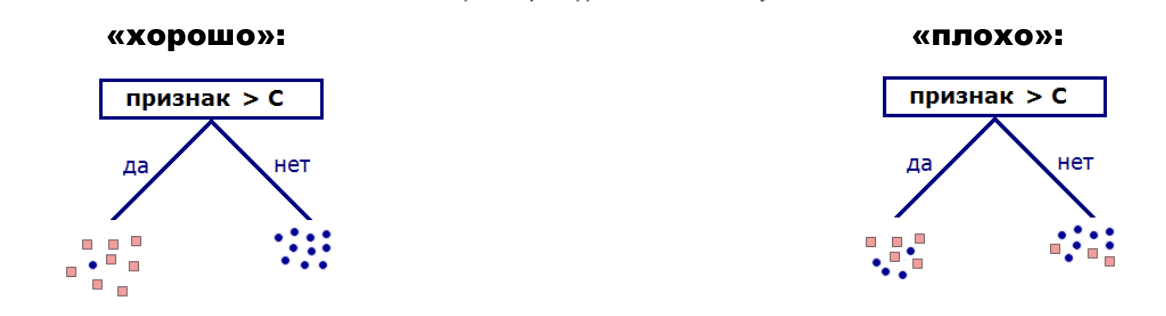

In [150]:
Image(filename = "расщепление1.png", width=700, height=700)

Решением этой задачи является введение так называемой меры неоднородности, или по другому impurity

Q - это функция, зависящая от заданного параметра меток классов R и порога разбиения тетта
Для этого мы рассчитываем некую функцию H(R), рассчитываем ее слева и справа, домножаем на некий "поправочный" коэффициент - отношение кол-ва элементов в определенной части к кол-ву всех. Это оберегает нас от разделения по самому "крайнему" значению

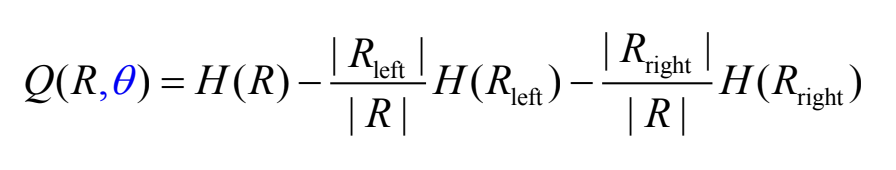

In [139]:
Image(filename = "расчетнеоднородности.png", width=700, height=700)

#### Здесь нужно расписать эту формулу - зачем нам "нормализаторы"

### Какие бывают формулы расчета ? 
Джини

Энтропия

Missclassification criteria 

#### Энтропийный критерий можно теоретически обосновать с помощью Information Gain
Но говорить мы об этом сегодня не будем

### Как присвоить метку?

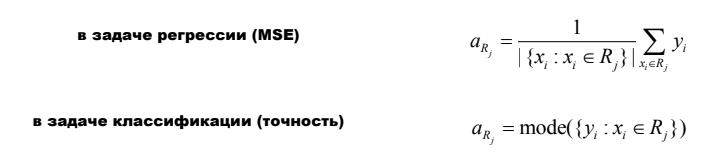

In [151]:
Image(filename = "присваивание меток.png", width=700, height=700)

### Расщепление в задачах регресии делается по дисперсии
привести пару формул

### Проблема переобучения деревьев

Глубокие деревья склонны к переобучению,
поскольку «затачиваются» на отдельные объекты

1. Прекращают построение достаточно рано
(см. критерии останова, stopping early)

можно на отложенной выборке выбрать точку останова

2. Подрезают деревья (post-pruning)

3. Используют в ансамблях (например, в случайном лесе)

### Итог: решающие деревья

возможности

*  способны обучиться на любой (непротиворечивой) выборке
(при возможности построения неограниченного дерева)
* можно использовать при признаках разных типов (+ пропуски)

* можно сделать устойчивыми к выбросам

* универсальный метод – для всех типов задач машинного обучения

* встроенный отбор признаков

* нелинейный метод!

##### качество

* не очень высокое качество решения задачи / переобучение

* хороши в ансамблях будет в ансамблировании

##### эффективность / стабильность

* достаточно быстро строятся

* нет ограничений на распределения признаков

* «неустойчивый алгоритм» ( меняется при небольшом изменении выборки)

* плох для больших / изменяющихся данных

##### понимание, интерпретация и анализ

* просто объяснить неспециалисту

* ближе к человеческой логики принятия решения

* можно изобразить (на слайде)

* нет красивой аналитической формулы для модели

## Ансамбли алгоритмов 


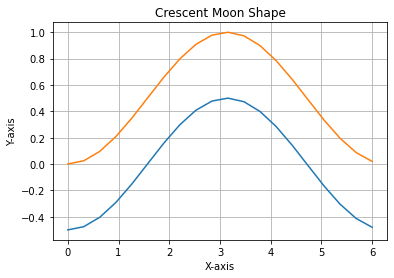

In [96]:
def generate_crescent_points(num_points):
    # Generate points from 0 to 10 on the x-axis
    x_values = np.linspace(0, 6, num_points)

    # Create a circular shape using sine and cosine functions
    circle_y = np.sin(x_values)

    # Create a smaller circle to form the crescent shape
    crescent_y1 = 0.5 * np.cos(x_values + np.pi) 
    crescent_y2 = 0.5 * np.cos(x_values + np.pi) + 0.5

    # Combine the two circles to form a crescent shape
    # y_values = circle_y + crescent_y

    return x_values, crescent_y1, crescent_y2

# Number of points to generate
num_points = 20

# Generate crescent moon points
x, y1, y2 = generate_crescent_points(num_points)

# Plot the crescent moon
plt.plot(x, y1)
plt.plot(x, y2)
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

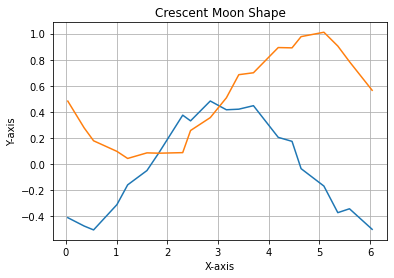

In [128]:
# Generate points from 0 to 10 on the x-axis
x_values = np.linspace(0, 6, 20) + np.random.uniform(-0.1,0.1, 20)

# Create a circular shape using sine and cosine functions
circle_y = np.sin(x_values)

# Create a smaller circle to form the crescent shape
crescent_y1 = 0.5 * np.cos(x_values + np.pi) + np.random.uniform(-0.1,0.1, 20)
crescent_y2 = 0.5 * np.sin(x_values + np.pi) + 0.5 + np.random.uniform(-0.1,0.1, 20)

# Combine the two circles to form a crescent shape
# y_values = circle_y + crescent_y


# Number of points to generate
num_points = 20

# Generate crescent moon points
# x, y1, y2 = generate_crescent_points(num_points)

# Plot the crescent moon
plt.plot(x_values, crescent_y1)
plt.plot(x_values, crescent_y2)
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [36]:
target1 = np.linspace(1, 1, 20)
target0 = np.linspace(0, 0, 20)
target = np.append(target0, target1)

In [72]:
data = np.array([np.append(x,x),np.append(y1,y2), target]).T

In [97]:
clf = DecisionTreeClassifier(random_state=0, max_depth=1)

In [94]:
clf.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(max_depth=1, random_state=0)

[Text(0.5, 0.75, 'X[1] <= -0.006\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]')]

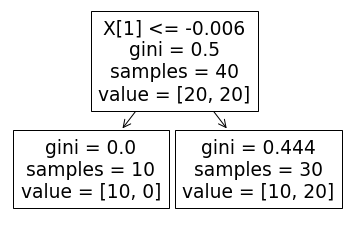

In [95]:
plot_tree(clf)

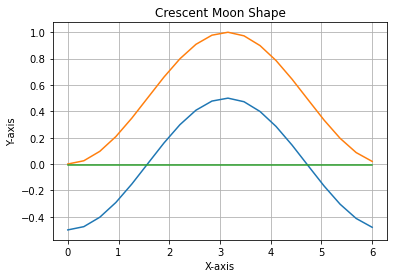

In [98]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, [-0.006]*20)
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [99]:
clf2 = DecisionTreeClassifier(random_state=0, max_depth=2)

In [100]:
clf2.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.006\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.5, 'X[1] <= 0.502\ngini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

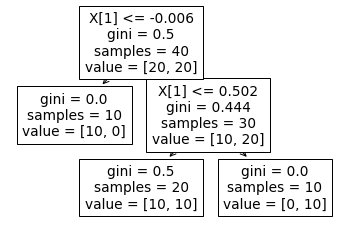

In [102]:
plot_tree(clf2)

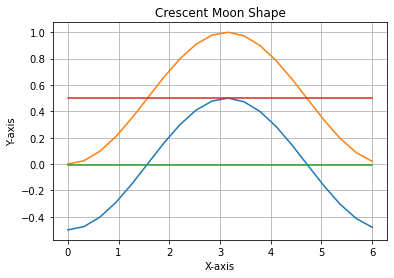

In [103]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, [-0.006]*20)
plt.plot(x, [0.502]*20)
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [104]:
clf3 = DecisionTreeClassifier(random_state=0, max_depth=3)

In [105]:
clf3.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.4, 0.875, 'X[1] <= -0.006\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.625, 'X[1] <= 0.502\ngini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.4, 0.375, 'X[0] <= 1.421\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

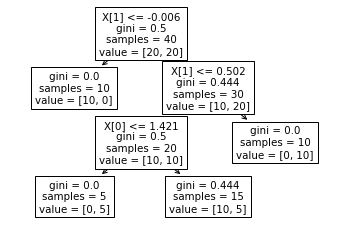

In [106]:
plot_tree(clf3)

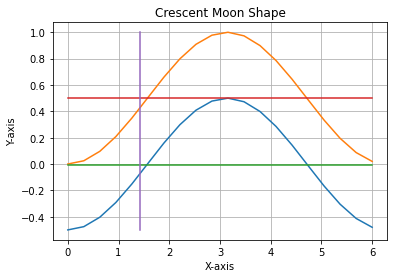

In [107]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, [-0.006]*20)
plt.plot(x, [0.502]*20)
plt.plot([1.421]*20, np.linspace(-0.5, 1, 20))
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [108]:
clf_res = DecisionTreeClassifier(random_state=0, max_depth=10)

In [109]:
clf_res.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.4, 0.9, 'X[1] <= -0.006\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.7, 'X[1] <= 0.502\ngini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.4, 0.5, 'X[0] <= 1.421\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.3, 'X[0] <= 4.579\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

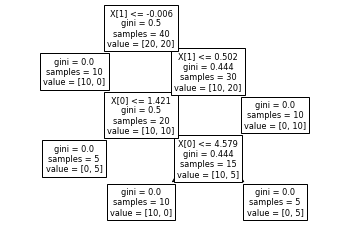

In [110]:
plot_tree(clf_res)

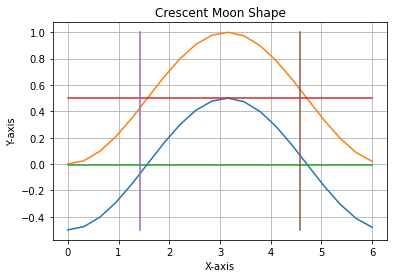

In [111]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, [-0.006]*20)
plt.plot(x, [0.502]*20)
plt.plot([1.421]*20, np.linspace(-0.5, 1, 20))
plt.plot([4.579]*20, np.linspace(-0.5, 1, 20))
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [112]:
clf_res_entropy = DecisionTreeClassifier(random_state=0, max_depth=10, criterion='entropy')

In [113]:
clf_res_entropy.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

[Text(0.4, 0.9, 'X[1] <= -0.006\nentropy = 1.0\nsamples = 40\nvalue = [20, 20]'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.7, 'X[1] <= 0.502\nentropy = 0.918\nsamples = 30\nvalue = [10, 20]'),
 Text(0.4, 0.5, 'X[0] <= 1.421\nentropy = 1.0\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.3, 'X[0] <= 4.579\nentropy = 0.918\nsamples = 15\nvalue = [10, 5]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]')]

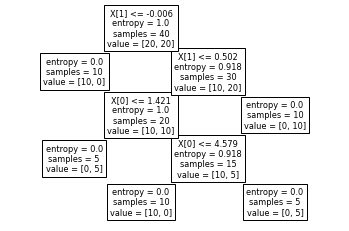

In [114]:
plot_tree(clf_res_entropy)

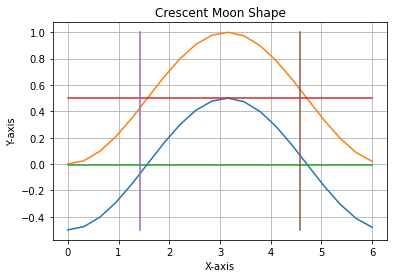

In [115]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, [-0.006]*20)
plt.plot(x, [0.502]*20)
plt.plot([1.421]*20, np.linspace(-0.5, 1, 20))
plt.plot([4.579]*20, np.linspace(-0.5, 1, 20))
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()